In [1]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.DataFrame(dados_vendas)

In [4]:
df.head()

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600


In [5]:
df.tail()

,mes,vendas
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100
10,Novembro,3200
11,Dezembro,3300


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


### EDA

In [7]:
df.describe()

,vendas
count,12.000000
mean,2716.666667
std,410.838020
min,2000.000000
25%,2450.000000
50%,2750.000000
75%,3025.000000
max,3300.000000


<Axes: xlabel='mes'>

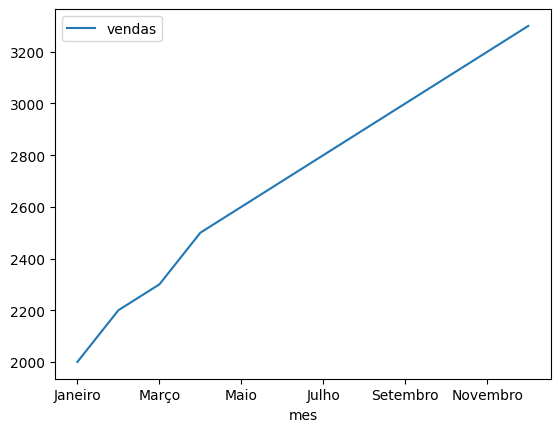

In [8]:
# Análise gráfica
df.plot.line(x='mes', y='vendas')

array([[<Axes: title={'center': 'vendas'}>]], dtype=object)

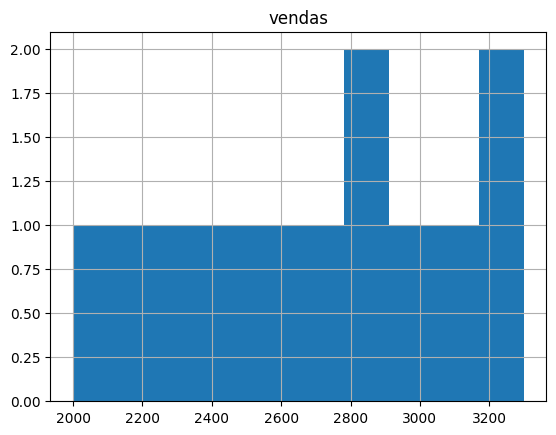

In [9]:
# Histograma dos dados
df.hist()

### Tratamento dos dados

In [10]:
# Converter o mês para número
df['mes_numero'] = range(1, 13)

### Preparar os dados

In [11]:
# Dividir os dados
X = df[['mes_numero']]
y = df['vendas']

In [12]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Treinar modelo

In [13]:
# Instanciar o modelo
model = LinearRegression()

In [14]:
# Treinar o modelo
model.fit(X_train, y_train)

LinearRegression()

### Avaliação do Modelo

In [15]:
# Fazer previsões
y_pred = model.predict(X_test)

In [16]:
# Calcular métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [17]:
# Mostrar métricas
print(f'R2: {r2}')
print(f'MSE: {mse}')

R2: 0.9740369055942159
MSE: 1882.3243444193504


### Previsão de vendas para Dezembro

In [18]:
# Predição de vendas para dezembro
vendas_dezembro = round(model.predict([[12]])[0], 2)
print(f'Previsão de vendas para dezembro: {vendas_dezembro}')

Previsão de vendas para dezembro: 3335.4


/home/emerson/Documentos/rocketseat/desenvolvimento_de_ia/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Plotar scatter plot

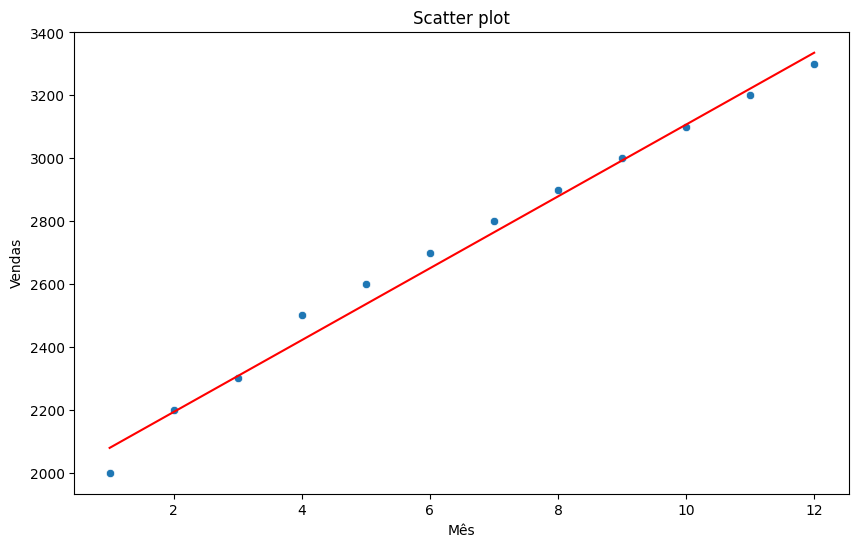

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_numero', y='vendas', data=df)
plt.plot(df['mes_numero'], model.predict(df[['mes_numero']]), color='red')
plt.title('Scatter plot')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()